# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [3]:
print(cities)

['jamestown', 'nakusp', 'darnah', 'tamiahua', 'klaksvik', 'agirish', 'ribeira grande', 'troitskoye', 'lamu', 'montrose', 'takoradi', 'vaini', 'chingirlau', 'qaqortoq', 'puerto ayora', 'ponta do sol', 'rikitea', 'yellowknife', 'port alfred', 'illoqqortoormiut', 'avarua', 'yar-sale', 'atuona', 'butaritari', 'kieta', 'georgetown', 'macaboboni', 'hilo', 'vao', 'khatanga', 'beaune', 'kokopo', 'castro', 'constitucion', 'kantunilkin', 'arrecife', 'naples', 'upernavik', 'longlac', 'imeni poliny osipenko', 'anadyr', 'port elizabeth', 'thompson', 'cape town', 'mataura', 'hobart', 'carnarvon', 'nioro', 'busselton', 'faanui', 'ushuaia', 'mys shmidta', 'hermanus', 'westport', 'lata', 'saint-louis', 'porto novo', 'marzuq', 'ballina', 'carutapera', 'udachnyy', 'aklavik', 'bluff', 'tasiilaq', 'olean', 'kodiak', 'norman wells', 'taolanaro', 'bredasdorp', 'kahului', 'purpe', 'manacapuru', 'belushya guba', 'rock sound', 'muhos', 'bengkulu', 'punta arenas', 'kudahuvadhoo', 'nizhneyansk', 'barentsburg', 'o

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# Save config information.

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={api_key}&units={units}&q="


In [37]:
city_data = []

# Parse out the max temp, humidity, and cloudiness

for city in cities:
    city_weather = requests.get(query_url + city).json()
    try:
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    except (KeyError, IndexError):
        print("processing | ", city)
    

        
# Append the City information into city_data list
    city_data.append({ 
                      "Lat": city_lat,
                      "Lng": city_lng, 
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                      "Country": city_country,
                      "Date": city_date})
else: 
        print(f"missing city", city, "skip")
print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")

processing |  illoqqortoormiut
processing |  macaboboni
processing |  arrecife
processing |  longlac
processing |  mys shmidta
processing |  taolanaro
processing |  belushya guba
processing |  bengkulu
processing |  nizhneyansk
processing |  barentsburg
processing |  okandja
processing |  olafsvik
processing |  domoni
processing |  tsihombe
processing |  attawapiskat
processing |  vaitupu
processing |  ondorhaan
processing |  amderma
processing |  louisbourg
processing |  akyab
processing |  samusu
processing |  skalistyy
processing |  rawannawi
processing |  utiroa
processing |  yei
processing |  saleaula
processing |  toliary
processing |  addis zemen
processing |  lawan kuda baharu
processing |  marcona
processing |  bairiki
processing |  hsinhua
processing |  nguiu
processing |  wau
processing |  sinkat
processing |  grand river south east
processing |  asau
processing |  labutta
processing |  kazalinsk
processing |  wahran
processing |  karaul
processing |  raga
processing |  vili

In [38]:
weather_data = pd.DataFrame(city_data)
weather_data

,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,68,AU,1553963110,90,-33.21,138.60,10.43,2.96
1,0,CA,1553962518,98,50.24,-117.80,0.00,0.86
2,32,LY,1553963111,100,32.77,22.64,14.13,11.71
3,48,MX,1553963111,93,21.28,-97.45,22.53,1.31
4,8,FO,1553961000,100,62.23,-6.59,0.00,8.20
5,88,RU,1553963111,80,61.92,63.02,0.98,5.81
6,40,PT,1553961600,72,38.52,-28.70,17.00,9.30
7,64,RU,1553963112,94,52.98,84.68,3.03,2.56
8,44,ID,1553963112,100,0.57,122.30,22.53,1.16
9,75,AU,1553963044,81,-37.81,145.34,12.78,5.10


In [39]:
weather_data.count()

Cloudiness    614
Country       614
Date          614
Humidity      614
Lat           614
Lng           614
Max Temp      614
Wind Speed    614
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
filename = "Weather_cities.csv"
with open(filename, 'a') as f:
    weather_data.to_csv(f, header=f.tell()==0)

In [41]:
weather_data.head()

,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,68,AU,1553963110,90,-33.21,138.60,10.43,2.96
1,0,CA,1553962518,98,50.24,-117.80,0.00,0.86
2,32,LY,1553963111,100,32.77,22.64,14.13,11.71
3,48,MX,1553963111,93,21.28,-97.45,22.53,1.31
4,8,FO,1553961000,100,62.23,-6.59,0.00,8.20


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

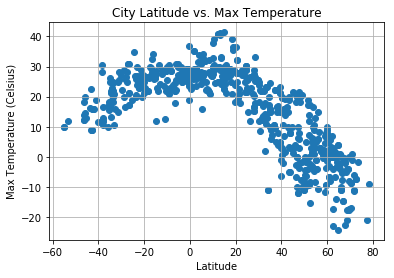

In [43]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_MaxTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

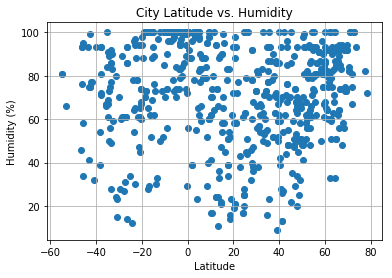

In [44]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

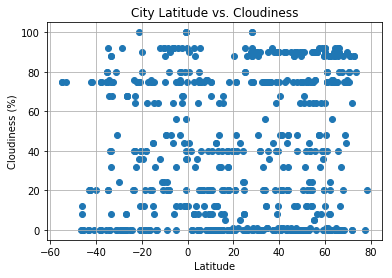

In [45]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

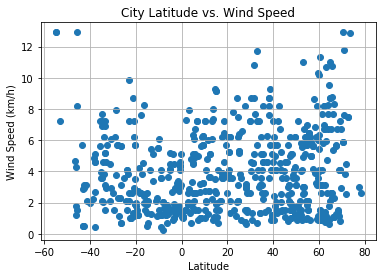

In [46]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (km/h)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_WindSpeed.png")

# Show plot
plt.show()